<a href="https://colab.research.google.com/github/Rida0201/Connect_Four_game/blob/main/NST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Content Image (photo to be transformed):


Saving GoldenGateBridge-001-768x576.jpg to GoldenGateBridge-001-768x576.jpg
Upload Style Image (artistic style to apply):


Saving 757px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg to 757px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg
Loading style transfer model...
Applying style transfer...


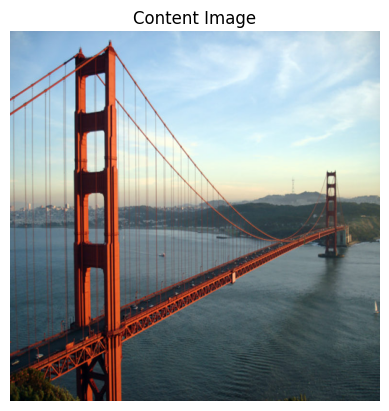

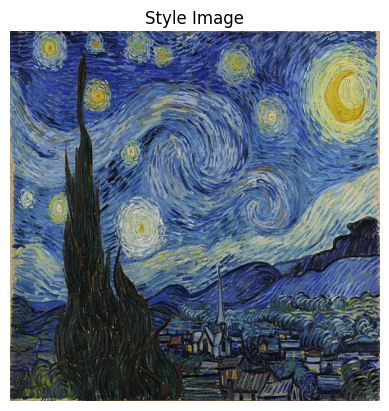

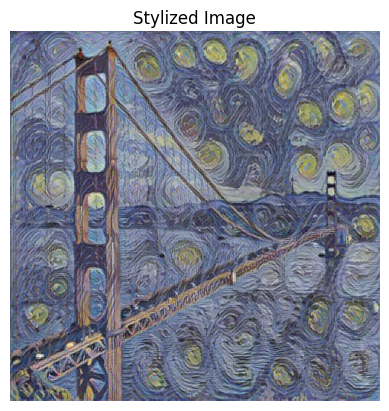

Style transfer complete! Download the output image below:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
!pip install tensorflow tensorflow-hub matplotlib pillow

import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from google.colab import files

def load_image(img_path, max_dim=512):
    img = Image.open(img_path).convert('RGB')
    img = img.resize((max_dim, max_dim))
    img = np.array(img) / 255.0
    img = img[np.newaxis, ...]
    return tf.constant(img, dtype=tf.float32)

print("Upload Content Image (photo to be transformed):")
uploaded_content = files.upload()
content_img_path = list(uploaded_content.keys())[0]

print("Upload Style Image (artistic style to apply):")
uploaded_style = files.upload()
style_img_path = list(uploaded_style.keys())[0]

content_image = load_image(content_img_path)
style_image = load_image(style_img_path)


print("Loading style transfer model...")
style_transfer_model = hub.load(
    'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
)


print("Applying style transfer...")
stylized_image = style_transfer_model(tf.constant(content_image), tf.constant(style_image))[0]


def show_image(img_tensor, title=''):
    plt.imshow(img_tensor[0])
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(content_image, "Content Image")
show_image(style_image, "Style Image")
show_image(stylized_image, "Stylized Image")


output_img = np.array(stylized_image[0] * 255, dtype=np.uint8)
Image.fromarray(output_img).save("stylized_output.jpg")

print("Style transfer complete! Download the output image below:")
files.download("stylized_output.jpg")